### Estuardo J. Díaz García (22008995)

# Proyecto final. Ciencia de Datos en Python.
---
Regresiones lineales univariadas usando gradiente descendente y librería Scikit Learn

In [58]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
dataset = np.load("proyecto_training_data.npy")

In [60]:
dataset.shape

(1460, 6)

In [61]:
train_set= dataset[0:1168,0:]
test_set= dataset[1168:,0:]

train_x_np = dataset[0:1168,1:]
train_y_np = dataset[0:1168,0:1]
test_x_np = dataset[1168:,1:]
test_y_np = dataset[1168:,0:1]

In [62]:
train_x_np.shape

(1168, 5)

In [63]:
train_y_np.shape

(1168, 1)

In [64]:
test_x_np.shape

(292, 5)

In [65]:
test_y_np.shape

(292, 1)

In [66]:
train_set.shape

(1168, 6)

In [67]:
test_set.shape

(292, 6)

In [68]:
dataset_df = pd.DataFrame(dataset,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])

train_set_df = pd.DataFrame(train_set,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
test_set_df = pd.DataFrame(test_set,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])

train_x_df = pd.DataFrame(train_x_np,columns=["OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
train_y_df = pd.DataFrame(train_y_np,columns=["SalePrice"])
test_x_df = pd.DataFrame(test_x_np,columns=["OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
test_y_df = pd.DataFrame(test_y_np,columns=["SalePrice"])

In [69]:
train_set_df.isnull().sum()
#Se comprueba que existen valores no numéricos (NaN) en el data frame de entrenamiento

SalePrice        0
OverallQual      0
1stFloorSF       0
TotalRooms       0
YearBuilt        0
LotFrontage    206
dtype: int64

In [70]:
test_set_df.isnull().sum()
#Se comprueba que existen valores no numéricos (NaN) en el data frame de testeo

SalePrice       0
OverallQual     0
1stFloorSF      0
TotalRooms      0
YearBuilt       0
LotFrontage    53
dtype: int64

In [71]:
#Se sustituyen todos los NaN por la media de la variable "LotFrontage" dado que sigue una distribución normal
no_nan_train=train_set_df.replace(np.nan,70.05)
no_nan_test=test_set_df.replace(np.nan,70.05)

train_set_df=pd.DataFrame(no_nan_train)
test_set_df=pd.DataFrame(no_nan_test)

train_set_df.isnull().sum()
#Se comprueba que ya no existen valores no numéricos (NaN) en el data frame de entrenamiento

SalePrice      0
OverallQual    0
1stFloorSF     0
TotalRooms     0
YearBuilt      0
LotFrontage    0
dtype: int64

In [72]:
#Se comprueba que ya no existen valores no numéricos (NaN) en el data frame de testeo
train_set_df.isnull().sum()

SalePrice      0
OverallQual    0
1stFloorSF     0
TotalRooms     0
YearBuilt      0
LotFrontage    0
dtype: int64

In [121]:
train_set_df

,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.00
1,181500.0,6.0,1262.0,6.0,1976.0,80.00
2,223500.0,7.0,920.0,6.0,2001.0,68.00
3,140000.0,7.0,961.0,7.0,1915.0,60.00
4,250000.0,8.0,1145.0,9.0,2000.0,84.00
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.00
1164,194000.0,5.0,1432.0,5.0,1978.0,70.05
1165,233170.0,7.0,1502.0,7.0,2009.0,79.00
1166,245350.0,8.0,1694.0,7.0,2008.0,64.00


In [74]:
print(dataset_df.shape)
dataset_df.head()

(1460, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [75]:
print(dataset_df.shape)
dataset_df.describe()

(1460, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [76]:
print(train_set_df.shape)
train_set_df.describe()

(1168, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.965154
std,78815.697902,1.378025,373.780374,1.609141,29.951707,21.305468
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,60.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.050000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,79.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [77]:
test_set_df.describe()

,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,182244.869863,6.092466,1187.839041,6.647260,1970.534247,70.389212
std,82026.898202,1.405076,433.843272,1.685462,31.229373,24.727303
min,52500.000000,3.000000,483.000000,3.000000,1872.000000,21.000000
25%,130000.000000,5.000000,881.250000,6.000000,1950.000000,60.000000
50%,163500.000000,6.000000,1106.000000,6.000000,1971.500000,70.050000
75%,214250.000000,7.000000,1407.750000,8.000000,2001.000000,78.000000
max,745000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


## Distribución de las variable dependiente e independientes (y, x1, x2, x3, x4, x5)
Histogramas para observar la distribución de cada variable

([<matplotlib.axis.XTick at 0x2b7a8267160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

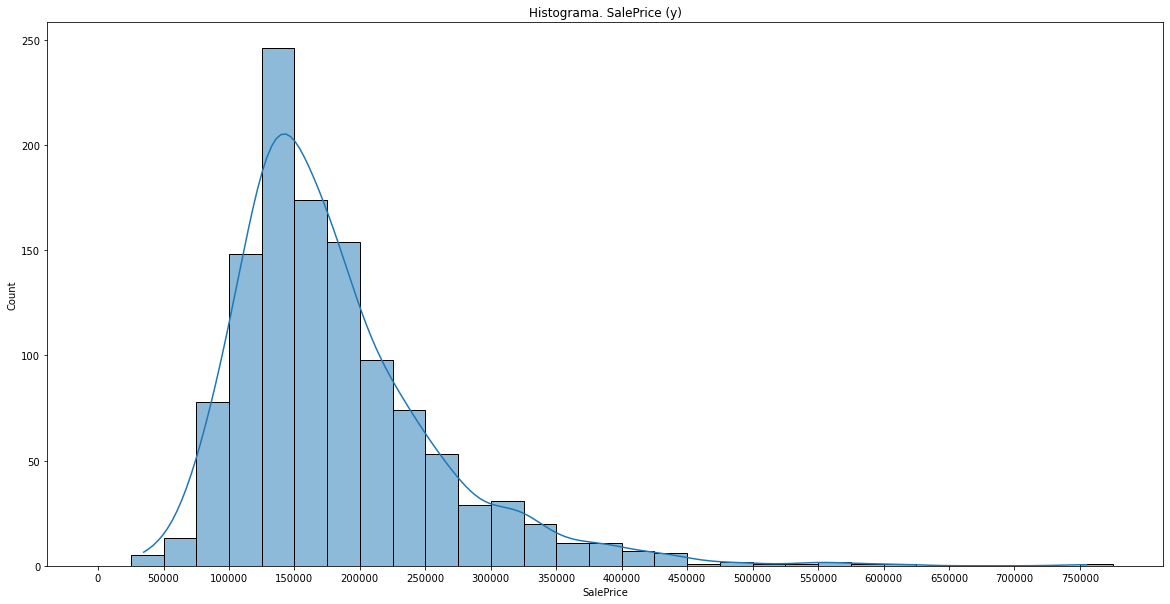

In [78]:
#De acuerdo con documentación de Seaborn, la función seaborn.distplot será descontinuada en el corto plazo, ellos
#recomiendan el uso de displot() o histplot()
plt.figure(figsize=(20,10))
sns.histplot(data=train_set_df,x="SalePrice",bins=np.arange(0,800000,25000),kde=True).set(title="Histograma. SalePrice (y)")
plt.xticks(np.arange(0,800000,50000))

([<matplotlib.axis.XTick at 0x2b7a8d3ec70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

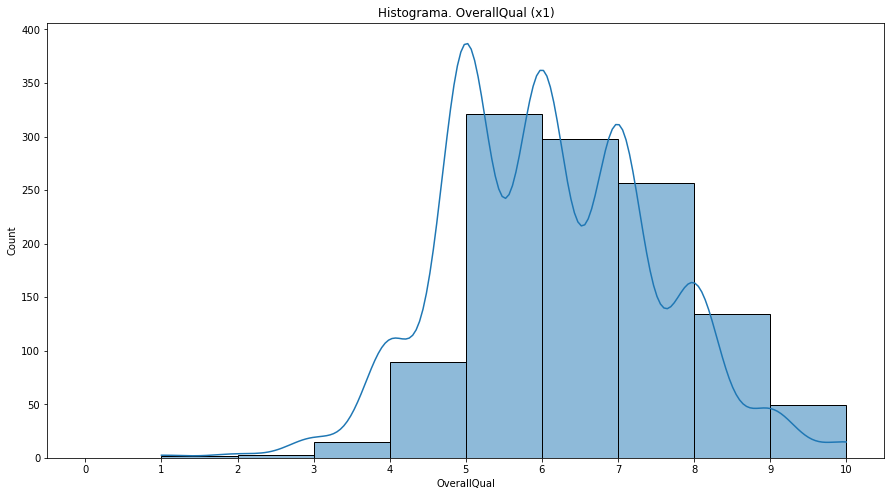

In [79]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="OverallQual",bins=np.arange(0,11,1),kde=True).set(title="Histograma. OverallQual (x1)")
plt.xticks(np.arange(0,11,1))

[Text(0.5, 1.0, 'Histograma. 1stFloorSF (x2)')]

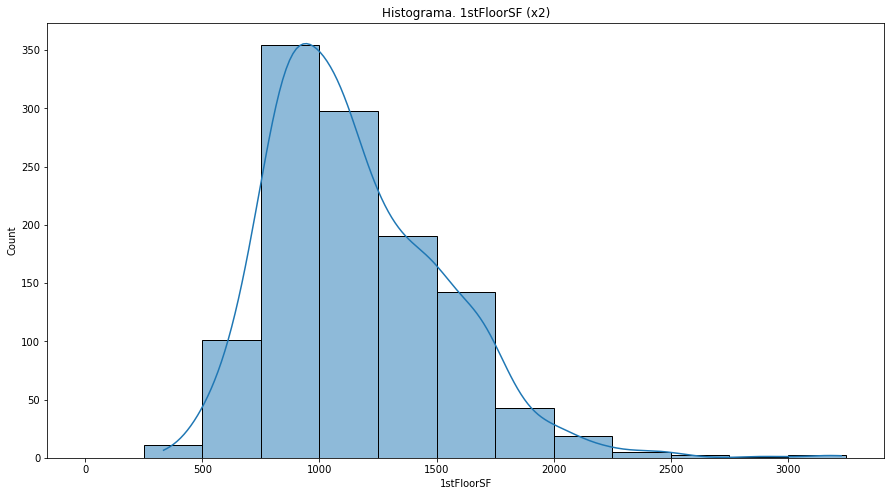

In [80]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="1stFloorSF",bins=np.arange(0,3500,250),kde=True).set(title="Histograma. 1stFloorSF (x2)")
#plt.xticks(np.arange(0,11,1))

([<matplotlib.axis.XTick at 0x2b7a89fca60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

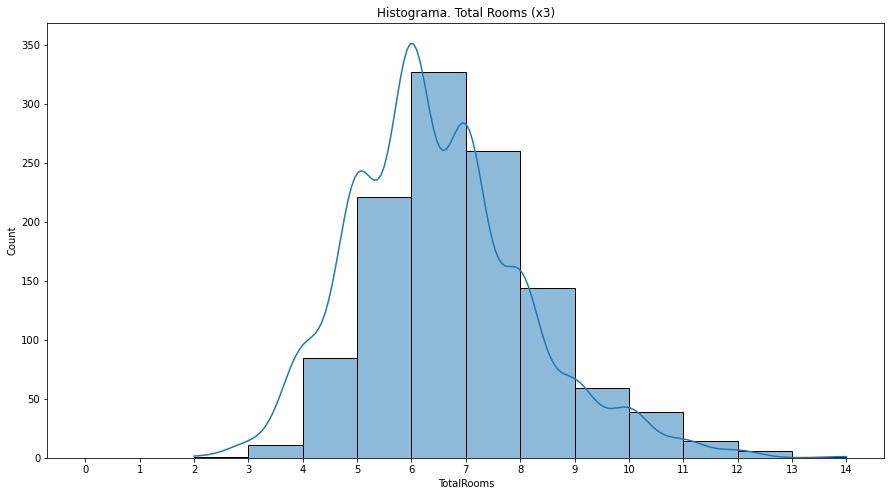

In [81]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="TotalRooms",bins=np.arange(0,15,1),kde=True).set(title="Histograma. Total Rooms (x3)")
plt.xticks(np.arange(0,15,1))

[Text(0.5, 1.0, 'Histograma. Year Built (x4)')]

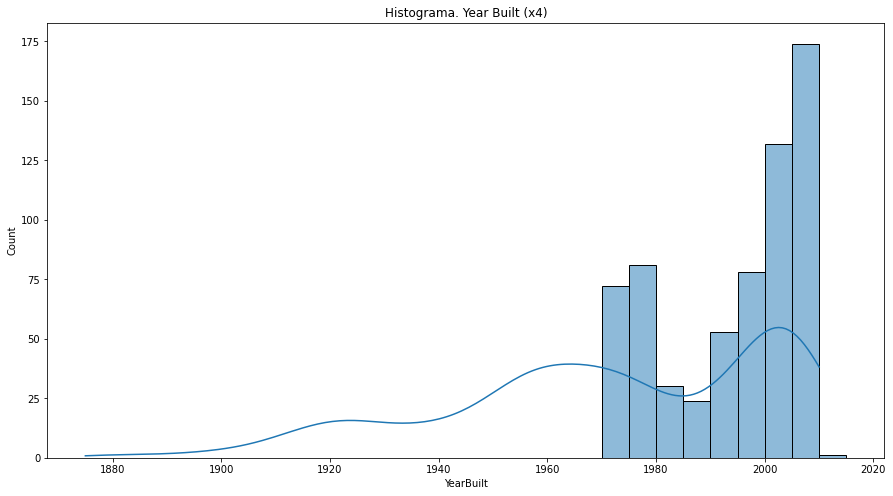

In [82]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="YearBuilt",bins=np.arange(1970,2020,5),kde=True).set(title="Histograma. Year Built (x4)")
#plt.xticks(np.arange(0,15,1))

[Text(0.5, 1.0, 'Histograma. Lot Frontage (x5)')]

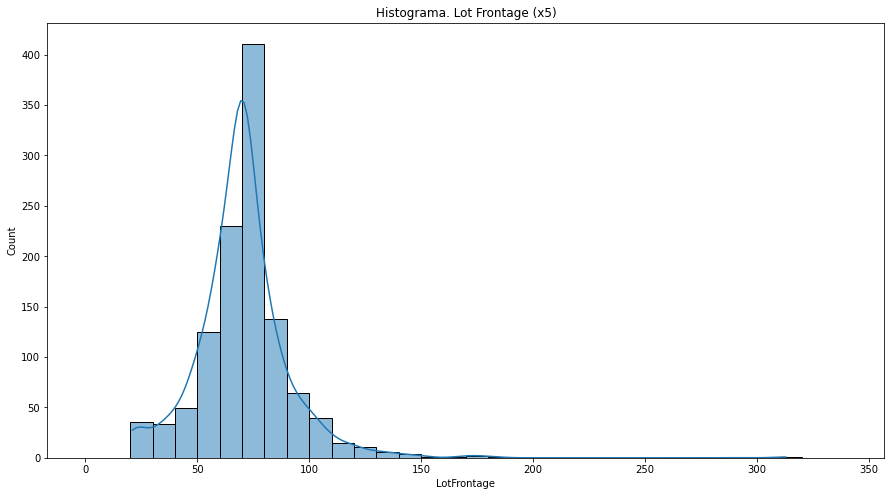

In [83]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="LotFrontage",bins=np.arange(0,350,10),kde=True).set(title="Histograma. Lot Frontage (x5)")
#plt.xticks(np.arange(0,15,1))

## Correlación de las variables independientes (_x_) con la dependiente (_y_)

In [84]:
y_train = dataset[0:1168,0:1]
x1_train = dataset[0:1168,1:2]
x2_train = dataset[0:1168,2:3]
x3_train = dataset[0:1168,3:4]
x4_train = dataset[0:1168,4:5]
x5_train = train_set_df.iloc[:,5]

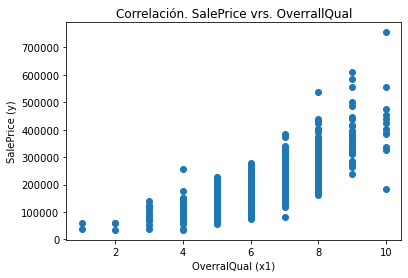

R: 0.7939900504626405


In [85]:
#Se utiliza el coeficiente de Pearson
corr_SalePrice_vrs_OverrallQual=np.corrcoef(train_set_df["SalePrice"],train_set_df["OverallQual"])

plt.scatter(x1_train,y_train)
plt.title("Correlación. SalePrice vrs. OverrallQual")
plt.xlabel("OverralQual (x1)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_OverrallQual[1,0])

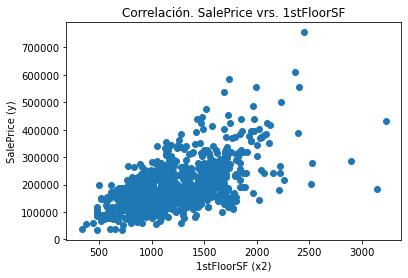

R: 0.6162887000998717


In [86]:
corr_SalePrice_vrs_1stFloorSF=np.corrcoef(train_set_df["SalePrice"],train_set_df["1stFloorSF"])

plt.scatter(x2_train,y_train)
plt.title("Correlación. SalePrice vrs. 1stFloorSF")
plt.xlabel("1stFloorSF (x2)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_1stFloorSF[1,0])

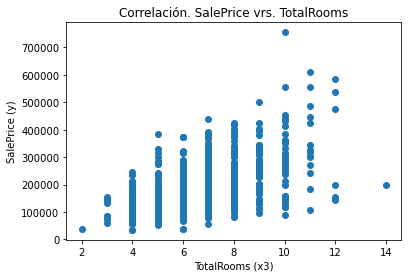

R: 0.5647069399593065


In [87]:
corr_SalePrice_vrs_TotalRooms=np.corrcoef(train_set_df["SalePrice"],train_set_df["TotalRooms"])

plt.scatter(x3_train,y_train)
plt.title("Correlación. SalePrice vrs. TotalRooms")
plt.xlabel("TotalRooms (x3)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_TotalRooms[1,0])

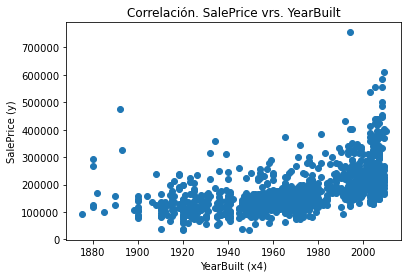

R: 0.5341706927117515


In [88]:
corr_SalePrice_vrs_YearBuilt=np.corrcoef(train_set_df["SalePrice"],train_set_df["YearBuilt"])

plt.scatter(x4_train,y_train)
plt.title("Correlación. SalePrice vrs. YearBuilt")
plt.xlabel("YearBuilt (x4)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_YearBuilt[1,0])

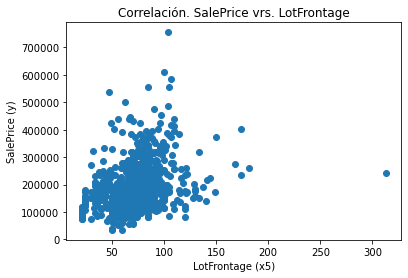

R: 0.3485384601559167


In [89]:
corr_SalePrice_vrs_LotFrontage=np.corrcoef(train_set_df["SalePrice"],train_set_df["LotFrontage"])

plt.scatter(x5_train,y_train)
plt.title("Correlación. SalePrice vrs. LotFrontage")
plt.xlabel("LotFrontage (x5)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_LotFrontage[1,0])

## Regresión lineal univariada utilizando una función (x1 = OverallQual)

La variable *x* que tiene una mayor correlación con *y* es **OverallQual**, por lo que se tomará como variable independiente para esta modelación.

El método a utilizar es el gradiente descendente estocástico, que es un algoritmo de optimización que buscará la recta de mejor ajuste con los datos.

En palabras simples, el algoritmo inicia con parámetros de pendiente (m) e intercepto (b) en 0 y va dando "pasitos" cambiando los parámetros y calculando el error que tienen en cada iteración (ephochs). Luego de varias iteraciones es elegida aquella recta que minimiza el error (se ha logrado la optimización).

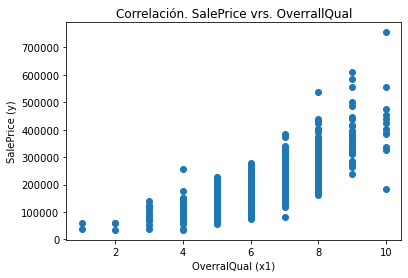

In [90]:
#Se visualizan los datos a utilizar
plt.scatter(x1_train,y_train)
plt.title("Correlación. SalePrice vrs. OverrallQual")
plt.xlabel("OverralQual (x1)")
plt.ylabel("SalePrice (y)")
plt.show()


In [91]:
#Los datos y y x1 se transforman a matrices
x1 = np.asmatrix(x1_train)
y = np.asmatrix(y_train)

x1.shape,y.shape

((1168, 1), (1168, 1))

In [92]:
# La función debe recibir como argumentos: vector X, vector Y, iteraciones (epochs), imprimir_error_cada que indica
#cada cuanto hay que imprimir el error en cierta iteración, lr (learning rate), que son los "pasitos" que da el modelo en cada
#iteración
def rlm1 (x,y,epochs,imprimir_error_cada,lr): #Regresión Lineal Manual 1 (rlm1), acá solo definimos los valores que recibirá
    return(0) #como no tiene sentencias aún, solo retornará un 0

In [93]:
#probamos la función, al momento solo retornará un 0
rlm1(x1,y,100,20,0.0001)


0

In [94]:
#La función debe crear una matriz de 2 columnas de la forma (x,1), todos los valores de x acompañados de 1's a la derecha
def rlm1 (x,y,epochs,imprimir_error_cada,lr):
    fx = x
    n=(len(x)) #cantidad de observaciones de x1
    
    matriz = np.zeros(shape=(n, 2), dtype=np.float32) #agregamos una matriz llena de ceros que tiene tantas filas como x
    #y 2 columnas, la primera contendrá el valor de x y a la derecha un 1
   
    vector1 = np.empty(len(matriz), dtype = np.float32) #Se crea vector que se llenará de 1's
    
    vector1.fill(1) #El vector anterior se llena de 1'2
    
    for i in range(len(fx)): #Se utiliza el ciclo range para ir llenando la columna 0 y 1 de la matriz creada anteriormente
        matriz[i,0] = fx[i] #la columna 0 se rellenará de los datos de x1
        matriz[i,1] = vector1[i] #la columna 1 se rellenará de 1's que provienen del vector 1
    print(matriz)

In [95]:
#probamos la función, al momento retornará una matriz de len(x1) x 2
#en la columna 0 estarán los datos de x1 y en la columna 1 los 1's requeridos
rlm1(x1,y,100,20,0.0001)

[[7. 1.]
 [6. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [8. 1.]
 [6. 1.]]


In [96]:
#Debemos inicializar los parámetros del modelo en un vector (pendiente, intercepto) = (m,b)
#luego con cada iteración los parámetros se van ajustando hacia la recta que tenga el menor error
def rlm1 (x,y,epochs,imprimir_error_cada,lr):

    fx = x
    n=(len(x))
    
    matriz = np.zeros(shape=(n, 2), dtype=np.float32)
    vector1 = np.empty(len(matriz), dtype = np.float32)
    vector1.fill(1)
    
    # Creamos el vector columna de m y b, le ponemos coef por COEFicientes
    coef = np.ndarray(shape=(2, 1), dtype=np.float32) #creamos vector de 2x1
    coef = np.asmatrix(coef) #convertimos el vector a matriz
    coef[0,0] = 0 #inicializamos m y b en 0, columna 0 y columna 1
    coef[1,0] = 0
    
    for i in range(len(fx)): 
        matriz[i,0] = fx[i]
        matriz[i,1] = vector1[i]
    print(coef)

In [97]:
#probamos la función, al momento imprimimos la matriz de coef y comprobamos que inicia con 0 en cada coeficiente (m y b)
rlm1(x1,y,100,20,0.0001)

[[0.]
 [0.]]


In [98]:
# Hay dos formas de hacer una regresión bajo este algoritmo, acá estamos usando la estocástica (o al menos intentando)
#Con esta forma las epochs son el número de iteraciones que el algoritmo hará, ahora por cada iteración o epoch
#Ahora para cacular las y estimadas (y_hat), para ello es requerido usar el producto punto (np.dot) entre la matriz donde está x
#acompañada de 0 y la matriz de coeficientes m y b.
def rlm1 (x,y,epochs,imprimir_error_cada,lr):
  
    fx = x
    n=(len(x))
    fy = y # tomamos ya las y observadas o datos reales
    ite = epochs #definimos las epochs como el número de iteraciones que dará el modelo
    
    matriz = np.zeros(shape=(n, 2), dtype=np.float32)
    vector1 = np.empty(len(matriz), dtype = np.float32)
    vector1.fill(1)
    
    coef = np.ndarray(shape=(2, 1), dtype=np.float32)
    coef = np.asmatrix(coef)
    coef[0,0] = 0
    coef[1,0] = 0
    
    for i in range(len(fx)): 
        matriz[i,0] = fx[i]
        matriz[i,1] = vector1[i]
    
    # Se realiza el producto punto entre la matriz de (x,1) y la de coeficientes (m,b), se usa un for que indica cuántas
    #iteraciones se deben hacer, lo que depende de las epochs que definió el usuario al inicio de la función
    for j in range(ite): 
        y_hat = np.dot(matriz,coef)
    print(y_hat.shape)
    print(y_hat)


In [99]:
#probamos la función, al momento imprimimos los y_hat, como no hemos aún trabajado en los errores, nos saldrá 0 porque los
#eficientes siguen siendo 0 al momento. Podemos ver que la matriz de y_hat tiene 1168 filas (las mismas que x) y 1 columna
rlm1(x1,y,100,20,0.0001)

(1168, 1)
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [100]:
#Calcular el error usando (la diferencia entre y - y_hat), la formula requerida es error = (1/2)promedio((y-yhat)^2)
def rlm1 (x,y,epochs,imprimir_error_cada,lr):

    fx = x
    fy = y
    ite = epochs
    n=(len(x))
    lr=lr #Asignamos el learning rate que el usuario ingresa a la variable lr dentro de la función
    

    matriz = np.zeros(shape=(len(fx), 2), dtype=np.float32)
    vector1 = np.empty(len(matriz), dtype = np.float32)
    vector1.fill(1)
    

    coef = np.ndarray(shape=(2, 1), dtype=np.float32)
    coef[0,0] = 0
    coef[1,0] = 0
    

    for i in range(len(fx)): 
        matriz[i,0] = fx[i]
        matriz[i,1] = vector1[i]
    
    # Creamos una matriz que recibirá los resultados finales de nuestra regresión, las 5 columnas serán el # de iteración,
    #el learning rate, las epochs definidas por el usuario, n como el valor de observaciones y el error.
    resultados = np.zeros(shape=(epochs, 5), dtype=np.float32)
    
    # Calculamos el producto punto de matrices para determinar el valor de y_hat
    for j in range(ite): 
        yhat = np.dot(matriz,coef)
        ce = fy-yhat #diferencia entre y observada y y estimada
        ce_2 = ce #diferencia que más adelante se elevará al cuadrado, por eso el 2
        
    # Realizamos el cálculo del error elevado al cuadrado    
        for k in range(len(yhat)):
            ce_2[k] = ce[k]*ce[k]
            
        #esta es la fórmula error = (1/2) promedio((y-yhat)^2)    
        error1 = (1/2)*np.mean((ce_2),axis=0)# el axis=0 indica que la operación e1 se hará hacia abajo a lo largo de cada columna
        
        resultados[j,0]=j+1 #la 1ra columna de la matriz de resultados será el # de iteración
        resultados[j,1]=lr #la 2da columna de la matriz de resultados será el learning rate definido por el usuario
        resultados[j,2]=epochs #la 3ra columna de la matriz de resultados será el número de epochs definifos por el usuario
        resultados[j,3]=n #la 4ta columna de la matriz de resultados será la cantidad de observaciones de x1
        resultados[j,4]=error1 #la 5ta columna de la matriz de resultados será el error determinado a partir de la fórmula requerida
        #en las instrucciones
    
    resultados_df = pd.DataFrame(resultados,columns=['Iteración', 'Learning rate (lr)', 'Epochs','n','Error'])
    print(resultados_df)


In [101]:
#probamos la función, al momento nos imprimira el dataframe de resultados. Podremos observar que como no hemos integrado el
#gradiente, de momento todas las columnas son constantes
rlm1(x1,y,100,20,0.0001)

    Iteración  Learning rate (lr)  Epochs       n         Error
0         1.0              0.0001   100.0  1168.0  1.940972e+10
1         2.0              0.0001   100.0  1168.0  1.940972e+10
2         3.0              0.0001   100.0  1168.0  1.940972e+10
3         4.0              0.0001   100.0  1168.0  1.940972e+10
4         5.0              0.0001   100.0  1168.0  1.940972e+10
..        ...                 ...     ...     ...           ...
95       96.0              0.0001   100.0  1168.0  1.940972e+10
96       97.0              0.0001   100.0  1168.0  1.940972e+10
97       98.0              0.0001   100.0  1168.0  1.940972e+10
98       99.0              0.0001   100.0  1168.0  1.940972e+10
99      100.0              0.0001   100.0  1168.0  1.940972e+10

[100 rows x 5 columns]


In [102]:
#Vamos a determinar el gradiente del error con la función gradiente = promedio(y-yhay)x[x,1]
def rlm1 (x,y,epochs,imprimir_error_cada,lr):

    fx = x
    fy = y
    ite = epochs
    n=(len(x))
    lr=lr
    

    matriz = np.zeros(shape=(len(fx), 2), dtype=np.float32)
    vector1 = np.empty(len(matriz), dtype = np.float32)
    vector1.fill(1)
    

    coef = np.ndarray(shape=(2, 1), dtype=np.float32)
    coef[0,0] = 0
    coef[1,0] = 0
    

    for i in range(len(fx)): 
        matriz[i,0] = fx[i]
        matriz[i,1] = vector1[i]
    
    resultados = np.zeros(shape=(epochs, 5), dtype=np.float32)
    
    for j in range(ite): 
        yhat = np.dot(matriz,coef)
        ce = fy-yhat
        ce_2 = ce
        
        gradiente_0 = yhat - fy #Empezamos a calcular el gradiente con la diferencia entre y_hat y y_observada, falta 
        #multiplicarlo por x y promediarlo
  
        for k in range(len(yhat)):
            ce_2[k] = ce[k]*ce[k]
               
        error1 = (1/2)*np.mean((ce_2),axis=0)
        
        #Generamos un vector de dos columnas con igual número de filas que el gradiente 
        #(que por depender de y, tendrá la misma amplitud), el vector estará lleno de ceros
        gradiente = np.zeros(shape=(len(gradiente_0), 2), dtype=np.float32) 
  
        
        l = 0 #Iniciamos un contador en 0
        
        for l in range(len(ce)): #usamos un for para ir multiplicando c/gradiente con la matriz (x,1) (la que generamos casi
            #al inicio de la función)
            gradiente[l,0] = gradiente_0[l]*matriz[l,0] #gradiente fila l y columna cero = grad*matriz
            gradiente[l,1] = gradiente_0[l]*matriz[l,1] #gradiente fila l y columna cero = grad*matriz
            
        gradiente = np.mean(gradiente,axis=0) #al vector resultante le calculamos la media, axis=0 significa que será hacia
        #abajo la operación. Con esto completamos la fórmula solicitada gradiente = promedio(y-yhay)x[x,1]
        
        resultados[j,0]=j+1
        resultados[j,1]=lr
        resultados[j,2]=epochs
        resultados[j,3]=n
        resultados[j,4]=error1
    
    resultados_df = pd.DataFrame(resultados,columns=['Iteración', 'Learning rate (lr)', 'Epochs','n','Error'])
    print(resultados_df)


In [57]:
#probamos la función hasta este punto no hay cambio porque el gradiente aún no se ha usado, se usará en el paso siguiente
rlm1(x1,y,100,20,0.0001)

    Iteración  Learning rate (lr)  Epochs       n         Error
0         1.0              0.0001   100.0  1168.0  1.940972e+10
1         2.0              0.0001   100.0  1168.0  1.940972e+10
2         3.0              0.0001   100.0  1168.0  1.940972e+10
3         4.0              0.0001   100.0  1168.0  1.940972e+10
4         5.0              0.0001   100.0  1168.0  1.940972e+10
..        ...                 ...     ...     ...           ...
95       96.0              0.0001   100.0  1168.0  1.940972e+10
96       97.0              0.0001   100.0  1168.0  1.940972e+10
97       98.0              0.0001   100.0  1168.0  1.940972e+10
98       99.0              0.0001   100.0  1168.0  1.940972e+10
99      100.0              0.0001   100.0  1168.0  1.940972e+10

[100 rows x 5 columns]


In [119]:
#Ya con el gradiente debemos actualizar los parámetros (coeficientes m y b) de la función con la
# fórmula [m,c] = [m,c] - lr * Gradiente

def rlm1 (x,y,epochs,imprimir_error_cada,lr):

    fx = x
    fy = y
    ite = epochs
    n=(len(x))
    lr=lr
    imprimir_error_cada = imprimir_error_cada
    ite_imprimir = int(ite/imprimir_error_cada) #se define el total de iteraciones (epochs) entre el múltiplo de iteraciones
    #en las cuales se imprimirá el error y se trinca a número int porque una matriz no tiene filas en float
    w = ite_imprimir-1 #w será el número de iteración (viéndolo desde la matriz sería la fila) en que se imprimirá el error
    #se coloca el -1 porque las filas en python comienzan en 0
    

    matriz = np.zeros(shape=(len(fx), 2), dtype=np.float32)
    vector1 = np.empty(len(matriz), dtype = np.float32)
    vector1.fill(1)
    

    coef = np.ndarray(shape=(2, 1), dtype=np.float32)
    coef[0,0] = 0
    coef[1,0] = 0
    

    for i in range(len(fx)): 
        matriz[i,0] = fx[i]
        matriz[i,1] = vector1[i]
    
    resultados = np.zeros(shape=(epochs, 7), dtype=np.float32)
    
    # Para la variable que recibe sobre imprimir el error cada cierto número de iteraciones
    #creamos una matriz para recibir estos resultados
    tabla_error_iteracion = np.zeros(shape=(ite_imprimir, 7), dtype=np.float32)
    
    for j in range(ite): 
        yhat = np.dot(matriz,coef)
        ce = fy-yhat
        ce_2 = ce
        
        gradiente_0 = yhat - fy
  
        for k in range(len(yhat)):
            ce_2[k] = ce[k]*ce[k]
               
        error1 = (1/2)*np.mean((ce_2),axis=0)
        

        gradiente = np.zeros(shape=(len(gradiente_0), 2), dtype=np.float32) 
  
        
        l = 0
        
        for l in range(len(ce)):
            gradiente[l,0] = gradiente_0[l]*matriz[l,0]
            gradiente[l,1] = gradiente_0[l]*matriz[l,1]
            
        gradiente = np.mean(gradiente,axis=0)
        
        coef[0,0] = (coef[0,0] - (lr*gradiente[0])) #se aplica la fórmula solicitada para calcular los nuevos m y b
        coef[1,0] = (coef[1,0] - (lr*gradiente[1])) #estos parámetros se van ajustando "pasito a pasito"
        
        resultados[j,0]=j+1
        resultados[j,1]=lr
        resultados[j,2]=epochs
        resultados[j,3]=n
        resultados[j,4]=coef[0,0]
        resultados[j,5]=coef[1,0]
        resultados[j,6]=error1  
    
        if (imprimir_error_cada-1 == w): #
            tabla_error_iteracion[int(j/imprimir_error_cada),0]=j+1
            tabla_error_iteracion[int(j/imprimir_error_cada),1]=lr
            tabla_error_iteracion[int(j/imprimir_error_cada),2]=epochs
            tabla_error_iteracion[int(j/imprimir_error_cada),3]=n
            tabla_error_iteracion[int(j/imprimir_error_cada),4]=coef[0,0]
            tabla_error_iteracion[int(j/imprimir_error_cada),5]=coef[1,0]
            tabla_error_iteracion[int(j/imprimir_error_cada),6]=error1
            
            w = 0
            
        w = w + 1

    tabla_error_iteracion_df = pd.DataFrame(tabla_error_iteracion,columns=['Iteración', 'Lr', 'epochs','n','m','b', 'error'])        
    resultados_df = pd.DataFrame(resultados,columns=['Iteración', 'Lr', 'epochs','n','m','b', 'error'])
    return(resultados_df)

In [120]:
rlm1(x1,y,100,20,0.0001)

,Iteración,Lr,epochs,n,m,b,error
0,1.0,0.0001,100.0,1168.0,118.794739,18.059021,1.940972e+10
1,2.0,0.0001,100.0,1168.0,237.113708,36.043716,1.926563e+10
2,3.0,0.0001,100.0,1168.0,354.958618,53.954498,1.912269e+10
3,4.0,0.0001,100.0,1168.0,472.332031,71.791573,1.898089e+10
4,5.0,0.0001,100.0,1168.0,589.235291,89.555229,1.884022e+10
...,...,...,...,...,...,...,...
95,96.0,0.0001,100.0,1168.0,9483.691406,1433.781128,9.795075e+09
96,97.0,0.0001,100.0,1168.0,9564.511719,1445.910767,9.727881e+09
97,98.0,0.0001,100.0,1168.0,9645.007812,1457.989868,9.661224e+09
98,99.0,0.0001,100.0,1168.0,9725.181641,1470.018677,9.595102e+09


In [34]:
def modelo_regresion (x,y,lr,epochs,imprimir_error_cada):
    m = 0
    b = 0
    imp = 0
    n=(len(x))
    e = int(epochs)
    n = float(len(x))
    for i in range(e):
        y_hat = m*x + b
        Derivada_m = (-2/n) * sum(x*(y - y_hat))
        Derivada_b = (-2/n) * sum(y - y_hat)
        m = m - lr*Derivada_m
        b = b - lr*Derivada_b
        if imp == imprimir_error_cada:
            imp=0
            print(sum(y-y_hat))
        imp+=1
    print ("La función de recta con mejor ajuste es: y = ",m,"x +",b)
    y_hat = m * x1_train + b
    plt.scatter(x1_train, y_train) 
    plt.plot([min(x1_train), max(x1_train)], [min(y_hat), max(y_hat)], color='red') #la función de una vez nos lanza la gráfica
    plt.show()
  
    


[91249161.1655337]
[37727303.17516953]
[13793566.06375488]
[3092562.32391795]
[-1690350.5673671]
[-3826510.27739522]
[-4778961.66300475]
[-5202024.29194038]
[-5388330.40485352]
La función de recta con mejor ajuste es: y =  [29765.59053807] x + [3671.74670007]


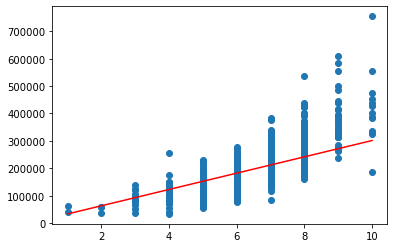

In [35]:
modelo_regresion(x1_train,y_train,0.0001,1000,100)

In [36]:
def modelo_regresion5 (x,y,lr,epochs,imprimir_error_cada):
    n_epochs=10
    resultados=np.ndarray(shape=(n_epochs,10),dtype=np.float32)
    for i in range(n_ephocs):
        x_train, x_test, y_train, y_test=tts(x,y,0.20)

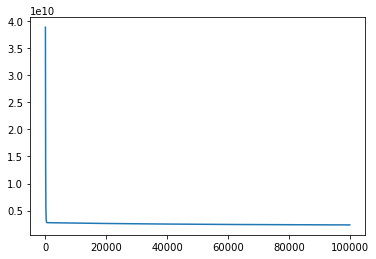

[38819444106.44349, 38244225379.33215, 37678189739.500534, 37121190581.03841, 36573083638.56576, 36033726949.866776, 35502980819.120346, 34980707780.71756, 34466772563.65686, 33961042056.507717, 33463385272.933456, 32973673317.764694, 32491779353.61427, 32017578568.025276, 31550948141.143444, 31091767213.90574, 30639916856.736755, 30195280038.744846, 29757741597.41016, 29327188208.7564, 28903508357.998955, 28486592310.661556, 28076332084.154034, 27672621419.803883, 27275355755.33427, 26884432197.781506, 26499749496.84479, 26121208018.661514, 25748709720.001137, 25382158122.871162, 25021458289.52844, 24666516797.889412, 24317241717.333008, 23973542584.8897, 23635330381.81086, 23302517510.51205, 22975017771.88447, 22652746342.96862, 22335619754.984367, 22023555871.711792, 21716473868.21718, 21414294209.918583, 21116938631.98571, 20824330119.068584, 20536392885.349888, 20253052354.91576, 19974235142.439926, 19699869034.17628, 19429882969.254856, 19164207021.276398, 18902772380.200825, 186

In [44]:
x = x1_train
y = y_train
m=0
b=0
lr=0.0001
epochs=100000
n=float(x.shape[0])
error=[]

for i in range(epochs):
    y_hat=m*x + b
    mse = (1/n)*(np.sum((y-y_hat)**2))
    error.append(mse)
    derivate_m = (-2/n) * (np.sum(x*(y - y_hat)))
    derivate_b = (-2/n) * (np.sum((y - y_hat)))
    m=m-lr*derivate_m
    b=b-lr*derivate_b

    
#plt.scatter(x1_train, y_train) 
#plt.plot([min(x1_train), max(x1_train)], [min(y_hat), max(y_hat)], color='red') #la función de una vez nos lanza la gráfica


plt.plot(error)
plt.show()
print(error)

In [58]:
def costo_error(x, y, parametros):
    n_observaciones = len(x)
    costo_sum = 0.0
    for x,y in zip(x,y):
        y_hat = np.dot(parametros, np.array([1.0, x]))
        costo_sum += (y_hat - y) ** 2
    
    costo = costo_sum / (n_observaciones * 2.0)
    return costo

In [59]:
def regresion_lineal_manual(x, y, parametros, lr):
    n_observaciones = len(x)
    costo = np.zeros(n_observaciones)
    parametros_guardar = np.zeros([2, n_observaciones])
    i = 0
    for x,y in zip(x,y):
        costo[i] = costo_error(x, y, parametros)
        parametros_guardar[:, i] = parametros
                       
        y_hat = np.dot(parametros, np.array([1.0, x]))
        gradiente = np.array([1.0, x]) * (y - y_hat)
        parametros +=lr * gradiente/n_observaciones
        
        i += 1
            
    return parametros, costo, parametros_guardar

In [2]:
def regresion_manual(x, y, lr, parametros):
    n_x = len(x)
    costo_error = np.zeros(n)
    parametros_m_b = np.zeros([2, n_x])
    contador = 0
    
    for x,y in zip(x,y): #primero calculamos la suma del error (buscamos la recta que tenga el menor error posible)
        costo_error_sum = 0.0
        for x,y in zip(x,y):
            y_hat = np.dot(parametros_m_b, np.array([1.0, x]))
            costo_error_sum += (y_hat - y) ** 2
        costo_error = costo_error_sum / (n_x * 2.0)
                
        parametros_m_b = parametros_store[:, i]
        
        #print('--------------------------')
        #print(f'iteration: {i}')
        #print(f'cost: {cost[i]}')
        
        y_hat = np.dot(parametros_m_b, np.array([1.0, x]))
        gradiente = np.array([1.0, x]) * (y - y_hat)
        parametros_m_b += lr * gradiente/n_x
        
        contador += 1
            
    return parametros_m_b, costo_error, params_store

In [41]:
lr = 1e-3
params_0 = np.array([20.0, 80.0])

regresion_manual(x1_train, y_train, params_0, lr)

TypeError: 'float' object cannot be interpreted as an integer

## Regresión lineal univariada utilizando una función (1stFloorSF)
La variable **x** que tiene la más alta correlación luego de OverallQual(x1) es **1stFloorSF (x2)**, por lo que se tomará como variable independiente para esta modelación.

## Regresión lineal univariada con scikit-learn
Las dos variables independientes que se tomará

Coef. de determinación R2: 0.6304202002336672
Pendiente (m): [[45411.99877916]]
Intercepto (b): [-96469.57131874]
La función de recta con mejor ajuste es: y =  [[45411.99877916]] x + [-96469.57131874]


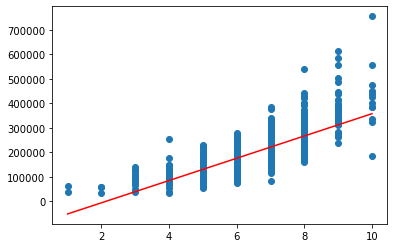

In [179]:
#El primer modelo se corre con SalePrice(y) vrs OverallQual(x1):
modelo_regresion_sk_x1=LinearRegression()
modelo_regresion_sk_x1.fit(x1_train,y_train)
r2_x1 = modelo_regresion_sk_x1.score(x1_train,y_train)
modelo_regresion_sk_x1.coef_
modelo_regresion_sk_x1.intercept_

print("Coef. de determinación R2:",r2_x1)
print("Pendiente (m):",modelo_regresion_sk_x1.coef_)
print("Intercepto (b):",modelo_regresion_sk_x1.intercept_)

print("La función de recta con mejor ajuste es: y = ",modelo_regresion_sk_x1.coef_,"x +",modelo_regresion_sk_x1.intercept_)

y_hat_sk_x1 = (modelo_regresion_sk_x1.coef_) * x1_train + (modelo_regresion_sk_x1.intercept_)
plt.scatter(x1_train, y_train) 
plt.plot([min(x1_train), max(x1_train)], [min(y_hat_sk_x1), max(y_hat_sk_x1)], color='red')
plt.show()

Coef. de determinación R2: 0.37981176187078936
Pendiente (m): [[129.95124229]]
Intercepto (b): [30324.58517496]
La función de recta con mejor ajuste es: y =  [[129.95124229]] x + [30324.58517496]


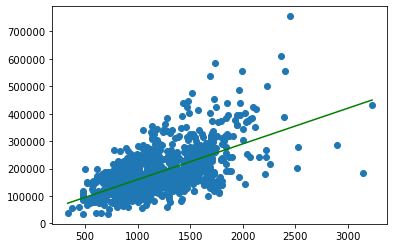

In [181]:
#El segundo modelo se corre con SalePrice(y) vrs 1stFloorSF(x2):
modelo_regresion_sk_x2=LinearRegression()
modelo_regresion_sk_x2.fit(x2_train,y_train)
r2_x2 = modelo_regresion_sk_x2.score(x2_train,y_train)
modelo_regresion_sk_x2.coef_
modelo_regresion_sk_x2.intercept_

print("Coef. de determinación R2:",r2_x2)
print("Pendiente (m):",modelo_regresion_sk_x2.coef_)
print("Intercepto (b):",modelo_regresion_sk_x2.intercept_)

print("La función de recta con mejor ajuste es: y = ",modelo_regresion_sk_x2.coef_,"x +",modelo_regresion_sk_x2.intercept_)

y_hat_sk_x2 = (modelo_regresion_sk_x2.coef_) * x2_train + (modelo_regresion_sk_x2.intercept_)
plt.scatter(x2_train, y_train) 
plt.plot([min(x2_train), max(x2_train)], [min(y_hat_sk_x2), max(y_hat_sk_x2)], color='green')
plt.show()

In [ ]:
#Se genera una función 
def regresion_sk ():